In [2]:
#Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools

In [3]:
#read data
data = pd.read_csv("diabetic.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

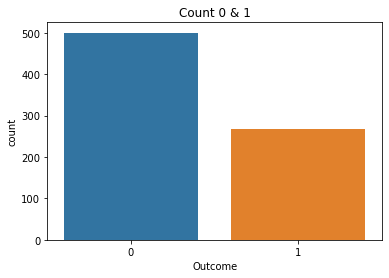

In [5]:
#Basic Visualization
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

In [6]:
#EDA
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


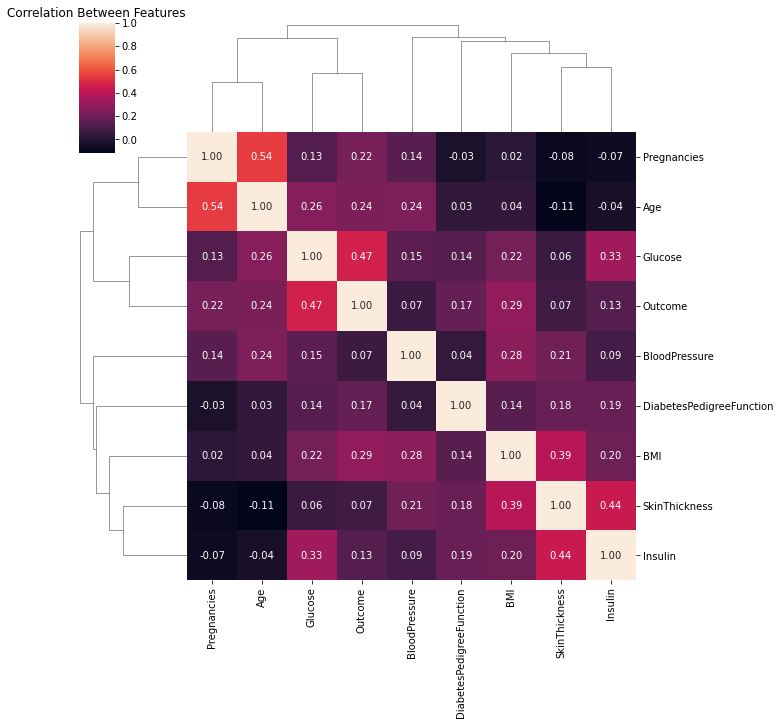

In [7]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

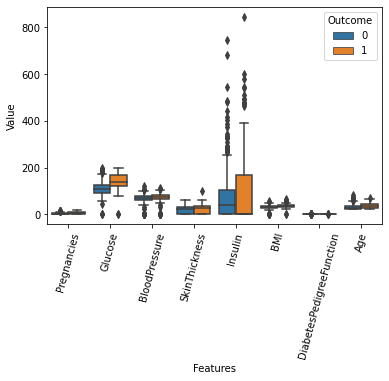

In [8]:
#Feautre Visualization with Box plot Before Standardization
data_melted = pd.melt(data,id_vars='Outcome',var_name='Features', value_name='Value')
plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted)
plt.xticks(rotation=75)
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_7248/1047498277.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


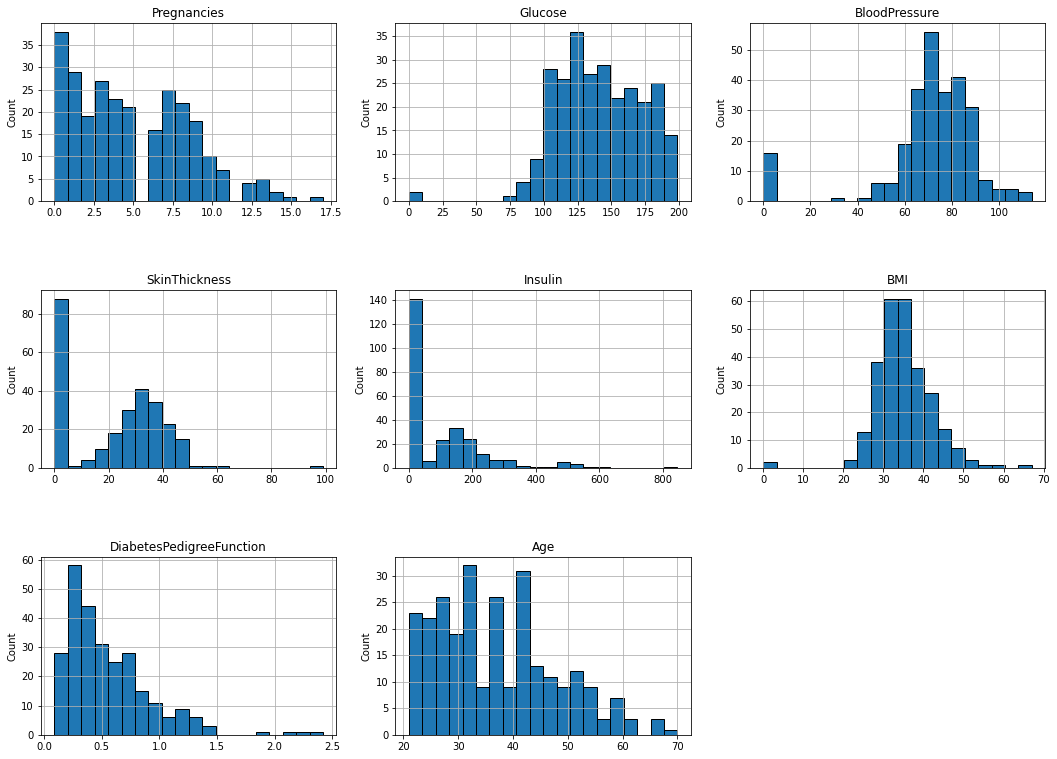

In [9]:
#Analysis of Diabetic Cases
data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_7248/149370241.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


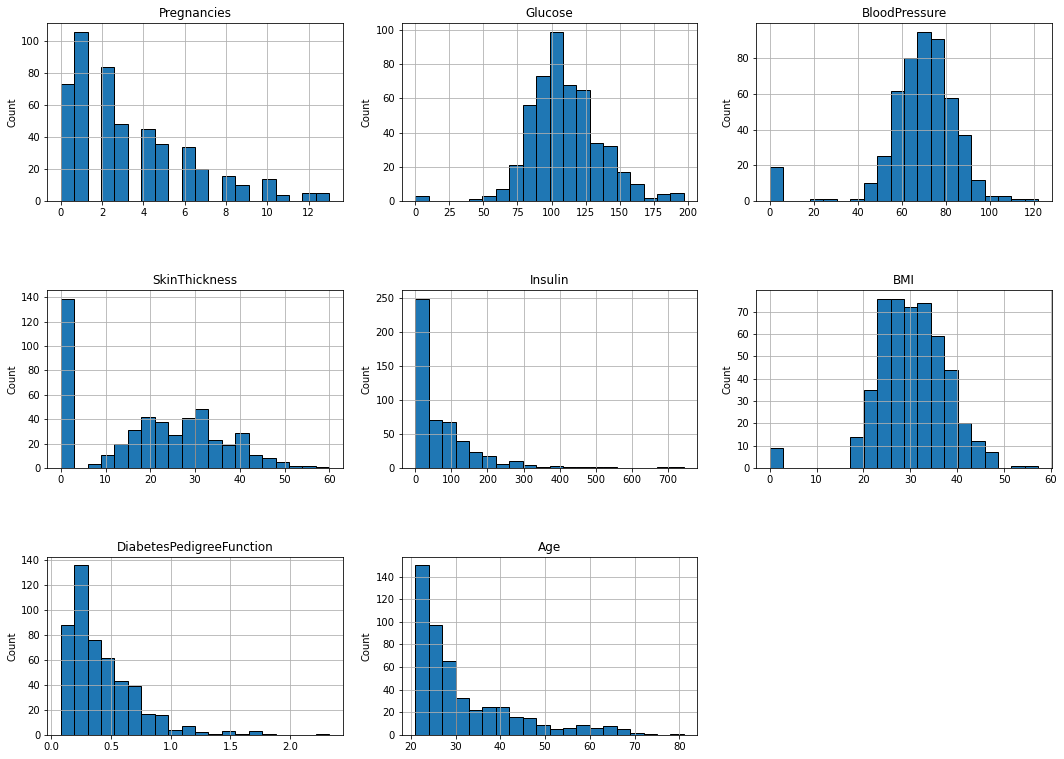

In [10]:
#Analysis of Non-Diabetic Cases
data2 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data2[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

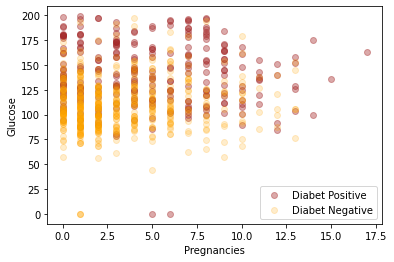

In [11]:
#Visualization of Features
plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

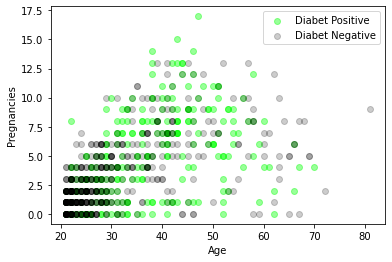

In [12]:
#Visualization, Scatter Plot
plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

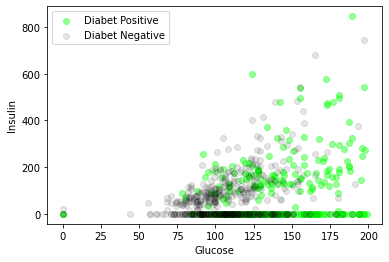

In [13]:
#Visualization, Scatter Plot
plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

In [14]:
#Train Tespt Split & Standardization Processing
test_size = 0.2
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=1)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

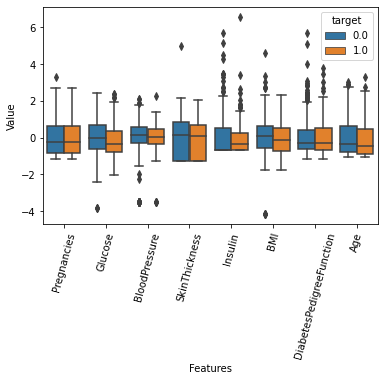

In [16]:
#Box Plot Visualization after the Standardization
data_melted = pd.melt(x_train_df,id_vars='target', var_name='Features', value_name='Value')
plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75)
plt.show()

In [17]:
#Support Vector Machine (SVM)
#SVM with Sklearn
from sklearn.svm import SVC
SVM = SVC(random_state=1)

In [18]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7492069838731175
Standart Deviation Accuracies:  0.02056427373353327


In [19]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))
SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.8051948051948052


In [30]:
SVM.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [34]:
x_test[12]

array([-1.14225474,  1.85689981,  0.46334951,  2.72478729, -0.55829264,
        3.61576692,  5.98054143, -0.70318679])

In [36]:
SVM.predict([[-1.14225474, 1.85689981, 0.46334951, 2.72478729, -0.55829264, 3.61576692, 5.98054143, -0.70318679]])

array([1], dtype=int64)